In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
from utils import boxplots_utils

In [3]:
# experiment = "four_regions"
experiment = "random_mixed"

In [4]:
figName = 'completedareas_groupsize0.75_randomMixed_adaptivewalk'
figName2 = 'different_completedareas_groupsize0.75_randomMixed_adaptivewalk'

In [5]:
results_folder = os.path.join(os.getcwd(), "results_adaptive/"+experiment)

In [6]:
if not os.path.isdir(results_folder):
    print(colored("Error, results_folder does not exist", 'red'))
else:
    print(colored("OK, "+results_folder+" exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_adaptive/random_mixed exists


### Completed task distribution

In [7]:
timeout = -1 
exp_dict = {}

for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("\tTimeout folder:", 'blue'),timeout_folder)
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
            timeout = int(param.split("#")[-1]) * 10
            # print("\ttimeoutR:",timeoutR)

    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
        
    completed_areas = np.array([])
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("taskLOG_client.tsv"):
#                 print("\t\tFilename:",filename)
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_areas = np.append(completed_areas, 0)
                continue

#                 print("\tPath:", os.path.join(results_folder, experiment, timeout_folder, filename))
            df = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            completed_areas = np.append(completed_areas, df.shape[0])

    exp_dict[timeout] = completed_areas

	Timeout folder: random_mixed_2021-05-05_robots#24_timeout#1_redAreas#4_1800seconds
	WARNING, empty file at:seed#81_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#86_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#95_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#88_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#43_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#2_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#38_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#1_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#56_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#9_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#68_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#94_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#78_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#10_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#96_completed_taskLOG_client.tsv
	WAR

In [ ]:
# boxplots_utils.print_dict(exp_dict)

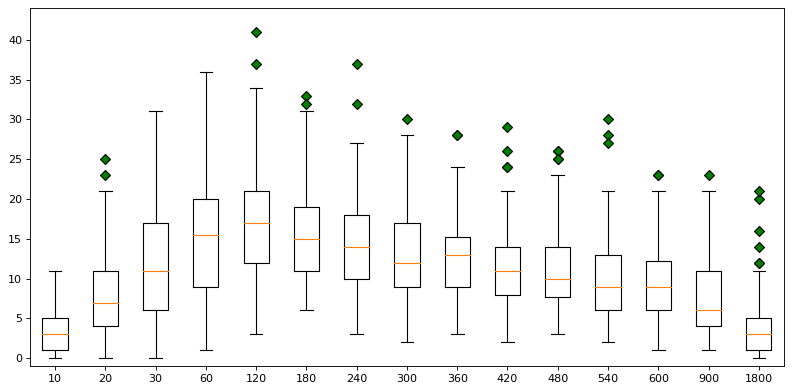

In [8]:
boxplots_utils.simple_boxplot(exp_dict, figName)

### Completed task distribution for each type of task

In [9]:
timeout = -1

red_dict = {}
blue_dict = {}
mixed_dict = {}

for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    
    print(colored("\n\nTimeout folder:"+timeout_folder, 'green'))
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
            timeout = int(param.split("#")[-1]) * 10
            # print("\ttimeout:",timeout)

    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
        
    red_array = np.array([])
    blue_array = np.array([])
    mixed_array = np.array([])
    completed_client = np.array([])
    completed_server = np.array([])
    for filename in natsorted(os.listdir(os.path.join(results_folder, timeout_folder))):
        if filename.endswith("taskLOG_client.tsv"):
            print("\tFilename:",filename)
            empty_c = not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0
            if empty_c:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                red_array = np.append(red_array, 0)
                blue_array = np.append(blue_array, 0)
                mixed_array = np.append(mixed_array, 0)
                continue

#                 print("\tPath:", os.path.join(results_folder, experiment, timeout_folder, filename))
            df = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df.columns =['Completed_t', 'ID', 'Creation_t', 'Completed_t', 'Type', 'Contained']
            completed_client = df.loc[:,"Type"].values
#             print(df)
            print("completed_client: ", completed_client)
            
            
        if filename.endswith("taskLOG_server.tsv"):
            print("\tFilename:",filename)
            empty_s = not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0
            if not empty_c and empty_s:
                sys.exit("ERROR!!!! client not empty, while empty server file at:" + filename)
            if empty_s:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue

#                 print("\tPath:", os.path.join(results_folder, experiment, timeout_folder, filename))
            df = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df.columns =['Completed_t', 'ID', 'Creation_t', 'Completed_t', 'Type', 'Contained']
            completed_server = df.loc[:,"Type"].values
            
#             print(df)
            print("completed_server: ",completed_server)
            
            
#             break
            
            red_sum = np.sum((completed_server==1) & (completed_client==1))
            blue_sum = np.sum((completed_server==0) & (completed_client==0))
            mixed_sum = np.sum((completed_server==0) & (completed_client==1)) + np.sum((completed_server==1) & (completed_client==0))
            print(colored("red_sum", 'red'), red_sum)
            print(colored("blue_sum", 'blue'), blue_sum)
            print(colored("mixed_sum", 'green'), mixed_sum)
            red_array = np.append(red_array, red_sum)
            blue_array = np.append(blue_array, blue_sum)
            mixed_array = np.append(mixed_array, mixed_sum)

    red_dict[timeout] = red_array
    blue_dict[timeout] = blue_array
    mixed_dict[timeout] = mixed_array
#     break  #evaluate just one folder



Timeout folder:random_mixed_2021-05-05_robots#24_timeout#1_redAreas#4_1800seconds
	Filename: seed#1_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#1_completed_taskLOG_client.tsv
	Filename: seed#1_completed_taskLOG_server.tsv
	WARNING, empty file at:seed#1_completed_taskLOG_server.tsv
	Filename: seed#2_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#2_completed_taskLOG_client.tsv
	Filename: seed#2_completed_taskLOG_server.tsv
	WARNING, empty file at:seed#2_completed_taskLOG_server.tsv
	Filename: seed#3_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0]
	Filename: seed#3_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 8
mixed_sum 0
	Filename: seed#4_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0]
	Filename: seed#4_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 0
	Filename: seed#5_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#5_completed_task

completed_client:  [0 0 0]
	Filename: seed#47_completed_taskLOG_server.tsv
completed_server:  [0 0 0]
red_sum 0
blue_sum 3
mixed_sum 0
	Filename: seed#48_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#48_completed_taskLOG_server.tsv
completed_server:  [0]
red_sum 0
blue_sum 1
mixed_sum 0
	Filename: seed#49_completed_taskLOG_client.tsv
completed_client:  [0 0 0]
	Filename: seed#49_completed_taskLOG_server.tsv
completed_server:  [0 0 0]
red_sum 0
blue_sum 3
mixed_sum 0
	Filename: seed#50_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0]
	Filename: seed#50_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 0
	Filename: seed#51_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0]
	Filename: seed#51_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 9
mixed_sum 0
	Filename: seed#52_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0]
	Filename: seed#52_completed_taskLOG

completed_client:  [0 0 0 0 0 0]
	Filename: seed#92_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 0
	Filename: seed#93_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#93_completed_taskLOG_server.tsv
completed_server:  [0]
red_sum 0
blue_sum 1
mixed_sum 0
	Filename: seed#94_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#94_completed_taskLOG_client.tsv
	Filename: seed#94_completed_taskLOG_server.tsv
	WARNING, empty file at:seed#94_completed_taskLOG_server.tsv
	Filename: seed#95_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#95_completed_taskLOG_client.tsv
	Filename: seed#95_completed_taskLOG_server.tsv
	WARNING, empty file at:seed#95_completed_taskLOG_server.tsv
	Filename: seed#96_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#96_completed_taskLOG_client.tsv
	Filename: seed#96_completed_taskLOG_server.tsv
	WARNING, empty file at:seed#96_completed_taskLOG_server.tsv
	Filename: seed#97_compl

completed_client:  [0 0]
	Filename: seed#35_completed_taskLOG_server.tsv
completed_server:  [0 0]
red_sum 0
blue_sum 2
mixed_sum 0
	Filename: seed#36_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0]
	Filename: seed#36_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 0
	Filename: seed#37_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0]
	Filename: seed#37_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 9
mixed_sum 0
	Filename: seed#38_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0]
	Filename: seed#38_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0]
red_sum 0
blue_sum 5
mixed_sum 0
	Filename: seed#39_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#39_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 11
mixed_sum 0
	Filename: seed#40_completed_taskLOG_client.tsv
completed_cl

completed_client:  [0 0 0 0 0 0 0 0 0 0]
	Filename: seed#77_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 0
	Filename: seed#78_completed_taskLOG_client.tsv
completed_client:  [0 0]
	Filename: seed#78_completed_taskLOG_server.tsv
completed_server:  [0 0]
red_sum 0
blue_sum 2
mixed_sum 0
	Filename: seed#79_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#79_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 14
mixed_sum 0
	Filename: seed#80_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0]
	Filename: seed#80_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 0
	Filename: seed#81_completed_taskLOG_client.tsv
completed_client:  [0 1 0]
	Filename: seed#81_completed_taskLOG_server.tsv
completed_server:  [0 0 0]
red_sum 0
blue_sum 2
mixed_sum 1
	Filename: seed#82_completed_taskLOG_client.tsv

completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 16
mixed_sum 0
	Filename: seed#13_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#13_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 25
mixed_sum 0
	Filename: seed#14_completed_taskLOG_client.tsv
completed_client:  [0 0 0]
	Filename: seed#14_completed_taskLOG_server.tsv
completed_server:  [0 0 0]
red_sum 0
blue_sum 3
mixed_sum 0
	Filename: seed#15_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#15_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 16
mixed_sum 0
	Filename: seed#16_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#16_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_s

completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#52_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 13
mixed_sum 0
	Filename: seed#53_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#53_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 17
mixed_sum 0
	Filename: seed#54_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#54_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 17
mixed_sum 0
	Filename: seed#55_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#55_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
red_sum 0
blue_sum 18
mixed_sum 1
	Filename: seed#56_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0]
	Filename: seed

completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 19
mixed_sum 0
	Filename: seed#93_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0]
	Filename: seed#93_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 0
	Filename: seed#94_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#94_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 17
mixed_sum 0
	Filename: seed#95_completed_taskLOG_client.tsv
completed_client:  [0 0]
	Filename: seed#95_completed_taskLOG_server.tsv
completed_server:  [0 0]
red_sum 0
blue_sum 2
mixed_sum 0
	Filename: seed#96_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#96_completed_taskLOG_server.tsv
completed_server:  [0]
red_sum 0
blue_sum 1
mixed_sum 0
	Filename: seed#97_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#97_complete

completed_client:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
	Filename: seed#29_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 14
mixed_sum 1
	Filename: seed#30_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0]
	Filename: seed#30_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0]
red_sum 0
blue_sum 5
mixed_sum 2
	Filename: seed#31_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0]
	Filename: seed#31_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 0
	Filename: seed#32_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#32_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 22
mixed_sum 0
	Filename: seed#33_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#33_completed_taskLOG_server.tsv
complet

completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
red_sum 1
blue_sum 14
mixed_sum 0
	Filename: seed#70_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0]
	Filename: seed#70_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 0
	Filename: seed#71_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#71_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 18
mixed_sum 0
	Filename: seed#72_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#72_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
red_sum 0
blue_sum 13
mixed_sum 4
	Filename: seed#73_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#73_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

completed_server:  [0 1 0 0 0 0 1 0 0 1]
red_sum 1
blue_sum 6
mixed_sum 3
	Filename: seed#10_completed_taskLOG_client.tsv
completed_client:  [1 0 0 0 1 1 0 0 0 0]
	Filename: seed#10_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 3
	Filename: seed#11_completed_taskLOG_client.tsv
completed_client:  [0 0 0]
	Filename: seed#11_completed_taskLOG_server.tsv
completed_server:  [0 1 0]
red_sum 0
blue_sum 2
mixed_sum 1
	Filename: seed#12_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#12_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 13
mixed_sum 4
	Filename: seed#13_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#13_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 1
blue_sum

completed_client:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#51_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 19
mixed_sum 1
	Filename: seed#52_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#52_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
red_sum 0
blue_sum 13
mixed_sum 3
	Filename: seed#53_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#53_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
red_sum 0
blue_sum 24
mixed_sum 3
	Filename: seed#54_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#54_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 20
mixed_sum 0
	Filename: seed#55_completed

completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#92_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 31
mixed_sum 1
	Filename: seed#93_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0]
	Filename: seed#93_completed_taskLOG_server.tsv
completed_server:  [0 1 1 1 1 0]
red_sum 0
blue_sum 2
mixed_sum 4
	Filename: seed#94_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
	Filename: seed#94_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
red_sum 0
blue_sum 13
mixed_sum 2
	Filename: seed#95_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 0 0]
	Filename: seed#95_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 1
	Filename: seed#96_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0]
	Filename: seed#96_completed_taskLOG_

completed_client:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#32_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
red_sum 0
blue_sum 16
mixed_sum 3
	Filename: seed#33_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
	Filename: seed#33_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 19
mixed_sum 1
	Filename: seed#34_completed_taskLOG_client.tsv
completed_client:  [1 0 0 1 0 0 1 1 0 0 0 0 0 0]
	Filename: seed#34_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
red_sum 1
blue_sum 10
mixed_sum 3
	Filename: seed#35_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 1 1]
	Filename: seed#35_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 1 0]
red_sum 1
blue_sum 6
mixed_sum 2
	Filename: seed#36_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 0 0 0 0 0]
	Filename: seed#36_com

completed_server:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 12
mixed_sum 6
	Filename: seed#68_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#68_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 1
	Filename: seed#69_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0]
	Filename: seed#69_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 0 0 1 0 0]
red_sum 0
blue_sum 8
mixed_sum 2
	Filename: seed#70_completed_taskLOG_client.tsv
completed_client:  [0 0 1 1 0 1 0 0 1]
	Filename: seed#70_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 0 0 1 0]
red_sum 0
blue_sum 3
mixed_sum 6
	Filename: seed#71_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#71_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 17
mixed_sum 2
	Filename: seed#72_complete

completed_client:  [0 0 1 0]
	Filename: seed#7_completed_taskLOG_server.tsv
completed_server:  [1 0 0 0]
red_sum 0
blue_sum 2
mixed_sum 2
	Filename: seed#8_completed_taskLOG_client.tsv
completed_client:  [1 0 0 1 0 0 1]
	Filename: seed#8_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 1 0 0]
red_sum 0
blue_sum 2
mixed_sum 5
	Filename: seed#9_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 1 0 0]
	Filename: seed#9_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 1]
red_sum 0
blue_sum 7
mixed_sum 2
	Filename: seed#10_completed_taskLOG_client.tsv
completed_client:  [1 1 1 1 1 0]
	Filename: seed#10_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 0]
red_sum 1
blue_sum 1
mixed_sum 4
	Filename: seed#11_completed_taskLOG_client.tsv
completed_client:  [0 0 0]
	Filename: seed#11_completed_taskLOG_server.tsv
completed_server:  [0 1 0]
red_sum 0
blue_sum 2
mixed_sum 1
	Filename: seed#12_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 

completed_server:  [0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0]
red_sum 2
blue_sum 12
mixed_sum 4
	Filename: seed#49_completed_taskLOG_client.tsv
completed_client:  [0 1 0 1 0 1 0 0 0 0 0]
	Filename: seed#49_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 8
mixed_sum 3
	Filename: seed#50_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 0 1 0 0 0 0 0 0]
	Filename: seed#50_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 1 0 0 0 0 1 0 0 0]
red_sum 1
blue_sum 11
mixed_sum 2
	Filename: seed#51_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#51_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
red_sum 0
blue_sum 15
mixed_sum 2
	Filename: seed#52_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
	Filename: seed#52_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
red_sum 0
bl

completed_server:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
red_sum 0
blue_sum 15
mixed_sum 4
	Filename: seed#90_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 1 0 1 1 1]
	Filename: seed#90_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 5
mixed_sum 5
	Filename: seed#91_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 0 1 0 1 0]
	Filename: seed#91_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0 1 0 0]
red_sum 0
blue_sum 4
mixed_sum 5
	Filename: seed#92_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
	Filename: seed#92_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 1
blue_sum 24
mixed_sum 1
	Filename: seed#93_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1]
	Filename: seed#93_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0]
red_sum 0
blue_sum 2
mixed_sum 2
	Filename: seed#94_complet

completed_server:  [0 0 0 0 0 1 0 0 0 1]
red_sum 0
blue_sum 4
mixed_sum 6
	Filename: seed#31_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 0 0 0 1 1]
	Filename: seed#31_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0 1]
red_sum 1
blue_sum 6
mixed_sum 3
	Filename: seed#32_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 1 0 0 0]
	Filename: seed#32_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 2
	Filename: seed#33_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
	Filename: seed#33_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 14
mixed_sum 1
	Filename: seed#34_completed_taskLOG_client.tsv
completed_client:  [1 0 0 0 0 1 1 1 0 0 0 0]
	Filename: seed#34_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 1 0 0 0]
red_sum 1
blue_sum 7
mixed_sum 4
	Filename: seed#35_completed_taskLOG_client.

completed_server:  [0 1 0 0 0 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 2
	Filename: seed#69_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
	Filename: seed#69_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0]
red_sum 2
blue_sum 11
mixed_sum 3
	Filename: seed#70_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 1 0 0 1 0 1]
	Filename: seed#70_completed_taskLOG_server.tsv
completed_server:  [0 1 0 1 0 0 1 0 0 0]
red_sum 0
blue_sum 3
mixed_sum 7
	Filename: seed#71_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
	Filename: seed#71_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]
red_sum 1
blue_sum 13
mixed_sum 4
	Filename: seed#72_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0]
	Filename: seed#72_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
red_sum 2
blue_sum 9
mixed_sum 

completed_server:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 8
	Filename: seed#9_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 1 0 0 0 1]
	Filename: seed#9_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 1 1 0 0 0]
red_sum 1
blue_sum 6
mixed_sum 4
	Filename: seed#10_completed_taskLOG_client.tsv
completed_client:  [1 1 0 0 1]
	Filename: seed#10_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0]
red_sum 0
blue_sum 1
mixed_sum 4
	Filename: seed#11_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 1 0]
	Filename: seed#11_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 1]
red_sum 1
blue_sum 3
mixed_sum 2
	Filename: seed#12_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 1 0 0 1 0 0 0]
	Filename: seed#12_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 1 0 0 0 0 0 0 0]
red_sum 1
blue_sum 9
mixed_sum 3
	Filename: seed#13_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 

	Filename: seed#49_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0]
	Filename: seed#49_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0]
red_sum 0
blue_sum 4
mixed_sum 1
	Filename: seed#50_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]
	Filename: seed#50_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0]
red_sum 1
blue_sum 11
mixed_sum 5
	Filename: seed#51_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
	Filename: seed#51_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
red_sum 1
blue_sum 13
mixed_sum 1
	Filename: seed#52_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
	Filename: seed#52_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 1 0 0 0 0 1 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 4
	Filename: seed#53_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
	Filename: s

completed_client:  [0 0 0 0 0 1 0 1 1 0 1 0 0 0]
	Filename: seed#90_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1]
red_sum 0
blue_sum 8
mixed_sum 6
	Filename: seed#91_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 0 0 1 1]
	Filename: seed#91_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 1 0 0]
red_sum 0
blue_sum 3
mixed_sum 5
	Filename: seed#92_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
	Filename: seed#92_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 15
mixed_sum 1
	Filename: seed#93_completed_taskLOG_client.tsv
completed_client:  [0 1 0 1]
	Filename: seed#93_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0]
red_sum 0
blue_sum 1
mixed_sum 3
	Filename: seed#94_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 1 0 0]
	Filename: seed#94_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0]
red_sum 1
blue_sum 7


completed_client:  [0 1 0 1 1 0 0 1]
	Filename: seed#31_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0 0 1]
red_sum 2
blue_sum 4
mixed_sum 2
	Filename: seed#32_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#32_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 14
mixed_sum 2
	Filename: seed#33_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 0 0 0 0 0]
	Filename: seed#33_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 1
	Filename: seed#34_completed_taskLOG_client.tsv
completed_client:  [1 0 0 1 0 0 1 0 0 1 1 0]
	Filename: seed#34_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 6
	Filename: seed#35_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 0 0 0 1 0 1 0 0 0 1]
	Filename: seed#35_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0

completed_client:  [0 0 1 0 1 0 0 0 0 0 1]
	Filename: seed#70_completed_taskLOG_server.tsv
completed_server:  [0 1 0 1 0 0 0 0 1 1 0]
red_sum 0
blue_sum 4
mixed_sum 7
	Filename: seed#71_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 1]
	Filename: seed#71_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 0 0 1]
red_sum 1
blue_sum 7
mixed_sum 1
	Filename: seed#72_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1]
	Filename: seed#72_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0]
red_sum 0
blue_sum 5
mixed_sum 1
	Filename: seed#73_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
	Filename: seed#73_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
red_sum 3
blue_sum 23
mixed_sum 0
	Filename: seed#74_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 1 0 0]
	Filename: seed#74_completed_taskLOG_server.tsv
completed_server

completed_server:  [0 1 0 0 0 0 0 1 0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 8
	Filename: seed#9_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 1 0 0 0 0 0 0]
	Filename: seed#9_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 1 0 1 0 1 1 0 0]
red_sum 1
blue_sum 6
mixed_sum 5
	Filename: seed#10_completed_taskLOG_client.tsv
completed_client:  [1 1 1 1 0 0 0]
	Filename: seed#10_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 1 0 0]
red_sum 1
blue_sum 2
mixed_sum 4
	Filename: seed#11_completed_taskLOG_client.tsv
completed_client:  [1 0 0 1 0 0 1 0]
	Filename: seed#11_completed_taskLOG_server.tsv
completed_server:  [0 0 1 1 1 0 0 1]
red_sum 1
blue_sum 2
mixed_sum 5
	Filename: seed#12_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1]
	Filename: seed#12_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 2
	Filename: seed#13_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 

completed_client:  [0 0 0 1 0 0 0]
	Filename: seed#49_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 1 0]
red_sum 0
blue_sum 5
mixed_sum 2
	Filename: seed#50_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 1 0 1 0 0]
	Filename: seed#50_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 1 0 0 0 0 0]
red_sum 1
blue_sum 10
mixed_sum 2
	Filename: seed#51_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
	Filename: seed#51_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
red_sum 1
blue_sum 13
mixed_sum 2
	Filename: seed#52_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0]
	Filename: seed#52_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0 0 1 0 0]
red_sum 0
blue_sum 6
mixed_sum 2
	Filename: seed#53_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0]
	Filename: seed#53_completed_taskLOG_server.tsv
completed_server:  

completed_client:  [0 1 0 1]
	Filename: seed#91_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 2
mixed_sum 2
	Filename: seed#92_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#92_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
red_sum 1
blue_sum 18
mixed_sum 2
	Filename: seed#93_completed_taskLOG_client.tsv
completed_client:  [0 1 1 0]
	Filename: seed#93_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 2
mixed_sum 2
	Filename: seed#94_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 0 0 0 1 0]
	Filename: seed#94_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0 0 0 0 1]
red_sum 0
blue_sum 9
mixed_sum 4
	Filename: seed#95_completed_taskLOG_client.tsv
completed_client:  [0 1 0]
	Filename: seed#95_completed_taskLOG_server.tsv
completed_server:  [0 0 1]
red_sum 0
blue_sum 1
mixed_sum 2
	Filename: s

completed_server:  [0 0 0 1 1 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 9
mixed_sum 4
	Filename: seed#33_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0]
	Filename: seed#33_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 0
	Filename: seed#34_completed_taskLOG_client.tsv
completed_client:  [1 0 0 1 0 1 0 0 0 1 0 0 0 0]
	Filename: seed#34_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0 0 1 0 0 0 0 1]
red_sum 0
blue_sum 7
mixed_sum 7
	Filename: seed#35_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 1 0 0 0 0]
	Filename: seed#35_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 1 0 0 0]
red_sum 0
blue_sum 5
mixed_sum 4
	Filename: seed#36_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 0 1 0 0 0 0]
	Filename: seed#36_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 0 0 1 0 0 0]
red_sum 0
blue_sum 8
mixed_sum 4
	Filename: seed#37_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 1 0 

completed_server:  [0 0 0]
red_sum 0
blue_sum 3
mixed_sum 0
	Filename: seed#75_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#75_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
red_sum 1
blue_sum 15
mixed_sum 1
	Filename: seed#76_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
	Filename: seed#76_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
red_sum 2
blue_sum 25
mixed_sum 0
	Filename: seed#77_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 0 0]
	Filename: seed#77_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0 0]
red_sum 1
blue_sum 6
mixed_sum 0
	Filename: seed#78_completed_taskLOG_client.tsv
completed_client:  [1 0 1 0 0 0 1 0 0 1 0 1 0]
	Filename: seed#78_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 1 0 0 0 1 0 0 0 1]
red_sum 0
blue_sum 4
mixed_sum 

completed_server:  [0 0 1]
red_sum 0
blue_sum 1
mixed_sum 2
	Filename: seed#12_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 0 0 1]
	Filename: seed#12_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0 1 1 0 1 0]
red_sum 1
blue_sum 6
mixed_sum 4
	Filename: seed#13_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	Filename: seed#13_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 18
mixed_sum 0
	Filename: seed#14_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 1 1 0 1]
	Filename: seed#14_completed_taskLOG_server.tsv
completed_server:  [0 1 1 0 0 0 0 0]
red_sum 1
blue_sum 3
mixed_sum 4
	Filename: seed#15_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 0 0 0 1 1 0]
	Filename: seed#15_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 3
	Filename: seed#16_completed_taskLOG_client.tsv
completed_client:  

completed_server:  [0 1 0 0 0 1 1 0 0 1 1 0 0]
red_sum 1
blue_sum 8
mixed_sum 4
	Filename: seed#53_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0]
	Filename: seed#53_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 0
	Filename: seed#54_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 1 0 0 0 0 1]
	Filename: seed#54_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 1 0]
red_sum 0
blue_sum 8
mixed_sum 3
	Filename: seed#55_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 1 0 0 0 0 1]
	Filename: seed#55_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 1 0 0 0 0 0]
red_sum 1
blue_sum 11
mixed_sum 1
	Filename: seed#56_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0]
	Filename: seed#56_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0]
red_sum 0
blue_sum 4
mixed_sum 2
	Filename: seed#57_completed_taskLOG_client.tsv
completed_client:  [0 1 0 

completed_server:  [0 0 0 0 0 0 1 1 0 0 1 0 0 0 0]
red_sum 0
blue_sum 10
mixed_sum 5
	Filename: seed#95_completed_taskLOG_client.tsv
completed_client:  [0 1 1 0 0]
	Filename: seed#95_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0]
red_sum 0
blue_sum 3
mixed_sum 2
	Filename: seed#96_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#96_completed_taskLOG_server.tsv
completed_server:  [0]
red_sum 0
blue_sum 1
mixed_sum 0
	Filename: seed#97_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0]
	Filename: seed#97_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0]
red_sum 0
blue_sum 5
mixed_sum 0
	Filename: seed#98_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
	Filename: seed#98_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
red_sum 0
blue_sum 13
mixed_sum 1
	Filename: seed#99_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 0 0 0 0 1 1 0 0]
	Filename: seed#99_completed_taskLO

completed_server:  [0 1 0 0 0 0 1 1 1 0 0 1]
red_sum 1
blue_sum 4
mixed_sum 7
	Filename: seed#36_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0]
	Filename: seed#36_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0]
red_sum 2
blue_sum 10
mixed_sum 8
	Filename: seed#37_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 1 0]
	Filename: seed#37_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 2
	Filename: seed#38_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 1 0]
	Filename: seed#38_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0]
red_sum 0
blue_sum 3
mixed_sum 3
	Filename: seed#39_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0]
	Filename: seed#39_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 3
mixed_sum 1
	Filename: seed#40_completed_taskLOG_client.tsv
completed_client:  [1 0 0 0 0 0 1 0 0

completed_server:  [0 0 0 0 0 1 0 0 0 0 0]
red_sum 1
blue_sum 9
mixed_sum 1
	Filename: seed#76_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
	Filename: seed#76_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
red_sum 1
blue_sum 15
mixed_sum 0
	Filename: seed#77_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 0 0]
	Filename: seed#77_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 0 0]
red_sum 0
blue_sum 6
mixed_sum 1
	Filename: seed#78_completed_taskLOG_client.tsv
completed_client:  [1 0 1 0 0 0 1 0 1 1 0]
	Filename: seed#78_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 1 0 1 0 0 1]
red_sum 0
blue_sum 2
mixed_sum 9
	Filename: seed#79_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 0 0 0 0 0 1]
	Filename: seed#79_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0 1 0 0 0 0]
red_sum 0
blue_sum 7
mixed_sum 3
	Filename: seed#80_completed_taskLOG_client.tsv
completed_clien

completed_server:  [0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0]
red_sum 5
blue_sum 15
mixed_sum 0
	Filename: seed#14_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#14_completed_taskLOG_client.tsv
	Filename: seed#14_completed_taskLOG_server.tsv
	WARNING, empty file at:seed#14_completed_taskLOG_server.tsv
	Filename: seed#15_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0]
	Filename: seed#15_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0]
red_sum 0
blue_sum 3
mixed_sum 1
	Filename: seed#16_completed_taskLOG_client.tsv
completed_client:  [0 1 0 0 1]
	Filename: seed#16_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0 0]
red_sum 0
blue_sum 2
mixed_sum 3
	Filename: seed#17_completed_taskLOG_client.tsv
completed_client:  [0 0 0 0]
	Filename: seed#17_completed_taskLOG_server.tsv
completed_server:  [0 1 0 0]
red_sum 0
blue_sum 3
mixed_sum 1
	Filename: seed#18_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#18_completed_taskLOG_server.tsv
com

completed_client:  [0 1 0 0]
	Filename: seed#57_completed_taskLOG_server.tsv
completed_server:  [0 0 1 0]
red_sum 0
blue_sum 2
mixed_sum 2
	Filename: seed#58_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0]
	Filename: seed#58_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 1
	Filename: seed#59_completed_taskLOG_client.tsv
completed_client:  [0]
	Filename: seed#59_completed_taskLOG_server.tsv
completed_server:  [0]
red_sum 0
blue_sum 1
mixed_sum 0
	Filename: seed#60_completed_taskLOG_client.tsv
completed_client:  [0 0 1 0 1 0 0]
	Filename: seed#60_completed_taskLOG_server.tsv
completed_server:  [0 1 0 1 0 1 0]
red_sum 0
blue_sum 2
mixed_sum 5
	Filename: seed#61_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0]
	Filename: seed#61_completed_taskLOG_server.tsv
completed_server:  [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0]
red_sum 5
blue_sum 16
mixed_sum 0
	Filename: seed#62_completed_taskLOG_cli

completed_server:  [0 0 0 0 0 0 0 0 0 1 1 0 0 0]
red_sum 1
blue_sum 12
mixed_sum 1
	Filename: seed#99_completed_taskLOG_client.tsv
completed_client:  [0 0 0 1 0]
	Filename: seed#99_completed_taskLOG_server.tsv
completed_server:  [0 0 0 0 0]
red_sum 0
blue_sum 4
mixed_sum 1
	Filename: seed#100_completed_taskLOG_client.tsv
completed_client:  [0 0]
	Filename: seed#100_completed_taskLOG_server.tsv
completed_server:  [0 1]
red_sum 0
blue_sum 1
mixed_sum 1


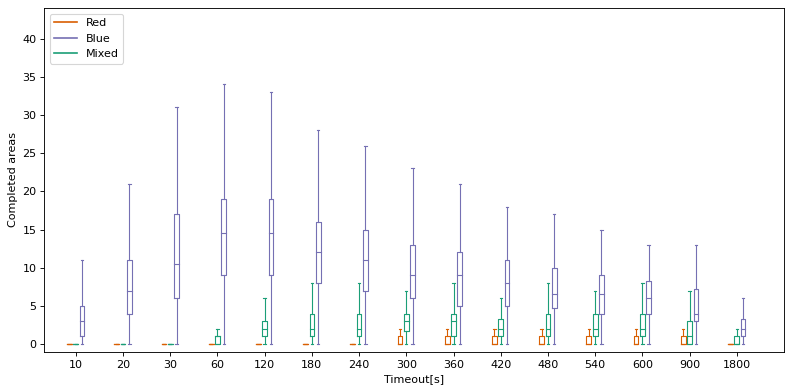

In [10]:
boxplots_utils.grouped_3_boxplot(red_dict, blue_dict, mixed_dict, figName2)